In [6]:
#import packages and files

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
merge1= pd.read_csv(r"merge1_final_with_resampling.csv")

# Percentage expired for countries with more than 5000 loans

In [9]:
merge1['country_name'].value_counts()[merge1['country_name'].value_counts()>5000]

Philippines     185497
Kenya            73384
El Salvador      43164
Cambodia         40685
Pakistan         31187
Peru             24206
Tajikistan       23003
Uganda           22805
Colombia         22614
Ecuador          15835
Nicaragua        13139
Nigeria          11264
Guatemala         8001
Rwanda            7501
Honduras          7086
Togo              6930
Mali              6883
Indonesia         6584
Sierra Leone      6080
Ghana             5211
Name: country_name, dtype: int64

In [10]:
counts = merge1['country_name'].value_counts()
sub_df = merge1[~merge1['country_name'].isin(counts[counts < 5000].index)].copy()

In [11]:
sub_df['country_name'].value_counts()

Philippines     185497
Kenya            73384
El Salvador      43164
Cambodia         40685
Pakistan         31187
Peru             24206
Tajikistan       23003
Uganda           22805
Colombia         22614
Ecuador          15835
Nicaragua        13139
Nigeria          11264
Guatemala         8001
Rwanda            7501
Honduras          7086
Togo              6930
Mali              6883
Indonesia         6584
Sierra Leone      6080
Ghana             5211
Name: country_name, dtype: int64

In [12]:
merge1.groupby(['country_name', 'status']).size()

country_name  status 
Afghanistan   funded        2
Belize        funded       99
Benin         expired       5
              funded       95
Bhutan        funded        1
                         ... 
Yemen         funded     1473
Zambia        expired      43
              funded      920
Zimbabwe      expired      14
              funded     4450
Length: 91, dtype: int64

In [13]:
df = sub_df.groupby(['country_name', 'status']).size()/merge1.groupby('country_name').size()

In [14]:
len(df)

40

In [15]:
df = df.to_frame()
df = df.rename(columns={0: 'percentage'})
df.reset_index(level=1, inplace=True)
df.reset_index(level=0, inplace=True)

In [16]:
df.columns.values

array(['country_name', 'status', 'percentage'], dtype=object)

In [17]:
len(df)

40

In [18]:
df.head(10)

,country_name,status,percentage
0,Cambodia,expired,0.024997
1,Cambodia,funded,0.975003
2,Colombia,expired,0.179844
3,Colombia,funded,0.820156
4,Ecuador,expired,0.036754
5,Ecuador,funded,0.963246
6,El Salvador,expired,0.166574
7,El Salvador,funded,0.833426
8,Ghana,expired,0.023028
9,Ghana,funded,0.976972


In [19]:
df = df.pivot(index='country_name', columns='status', values='percentage')
df

status,expired,funded
country_name,,
Cambodia,0.024997,0.975003
Colombia,0.179844,0.820156
Ecuador,0.036754,0.963246
El Salvador,0.166574,0.833426
Ghana,0.023028,0.976972
Guatemala,0.052868,0.947132
Honduras,0.063506,0.936494
Indonesia,0.096750,0.903250
Kenya,0.076529,0.923471


In [20]:
df['expired'] = df['expired'].fillna(0)
df['funded'] = df['funded'].fillna(0)

df['total'] = df['expired'].fillna(0) + df['funded'].fillna(0)
df = df.sort_values(by='funded', ascending=False).head(60)
df.reset_index(level=0, inplace=True)

In [21]:
df.iloc[:,1:] = df.iloc[:,1:].mul(100)

In [22]:
df

status,country_name,expired,funded,total
0,Togo,0.533911,99.466089,100.0
1,Philippines,1.331019,98.668981,100.0
2,Ghana,2.302821,97.697179,100.0
3,Peru,2.358919,97.641081,100.0
4,Cambodia,2.499693,97.500307,100.0
5,Ecuador,3.675403,96.324597,100.0
6,Guatemala,5.286839,94.713161,100.0
7,Pakistan,5.630551,94.369449,100.0
8,Sierra Leone,6.151316,93.848684,100.0
9,Honduras,6.350550,93.649450,100.0


In [23]:
merge1.country_name.nunique()

51

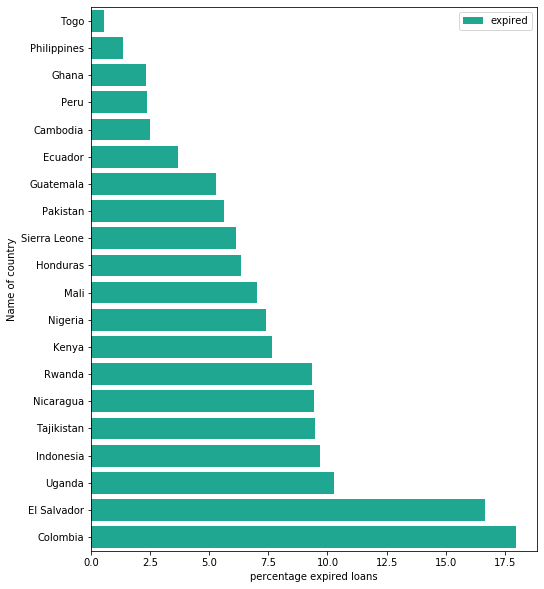

In [24]:
s_force_order = df.sort_values('funded', ascending=False)['country_name'].head(40)

fig, ax = plt.subplots(figsize=(8, 10))

sns.barplot(x='expired', y='country_name', data=df,
            label='expired', color='#0abda0', order=s_force_order)

ax.legend(ncol=2, loc='best', frameon=True)
ax.set(ylabel='Name of country',
       xlabel='percentage expired loans')

leg = ax.get_legend()
#new_title = 'Loan outcome?'
#leg.set_title(new_title)
#ax.set_title('Top countries with highest funded percentage', fontsize=15)
plt.show()

# Gender difference by country

In [25]:
df1 = sub_df.copy()

In [26]:
df1.isnull().sum()

loan_id                0
original_language      0
loan_amount            0
status                 0
activity_name          0
sector_name            0
country_name           0
partner_id             0
repayment_interval     0
distribution_model     0
year                   0
month                  0
description_ENG        0
borrower_count         0
loan_type              0
gender_reclassified    0
dominant_topic         0
Loan Theme Type        0
country                0
world_region           0
MPI                    0
dtype: int64

In [27]:
df4 = sub_df.groupby(['country_name', 'gender_reclassified','status']).size()/sub_df.groupby(['country_name', 'gender_reclassified']).size()
df4

country_name  gender_reclassified  status 
Cambodia      female               expired    0.025619
                                   funded     0.974381
              male                 expired    0.022102
                                   funded     0.977898
Colombia      female               expired    0.128201
                                                ...   
Togo          male                 funded     0.970968
Uganda        female               expired    0.033064
                                   funded     0.966936
              male                 expired    0.167854
                                   funded     0.832146
Length: 80, dtype: float64

In [28]:
len(df4)

80

In [29]:
df4 = df4.to_frame()
df4

0
country_name gender_reclassified status           
Cambodia     female              expired  0.025619
                                 funded   0.974381
             male                expired  0.022102
                                 funded   0.977898
Colombia     female              expired  0.128201
...                                            ...
Togo         male                funded   0.970968
Uganda       female              expired  0.033064
                                 funded   0.966936
             male                expired  0.167854
                                 funded   0.832146

[80 rows x 1 columns]

In [30]:
df4 = df4.rename(columns={0: 'percentage'})
df4.reset_index(level=2, inplace=True)
df4.reset_index(level=1, inplace=True)
df4.reset_index(level=0, inplace=True)

In [31]:
df4.columns.values

array(['country_name', 'gender_reclassified', 'status', 'percentage'],
      dtype=object)

In [32]:
len(df4)

80

In [33]:
df4.head(10)

,country_name,gender_reclassified,status,percentage
0,Cambodia,female,expired,0.025619
1,Cambodia,female,funded,0.974381
2,Cambodia,male,expired,0.022102
3,Cambodia,male,funded,0.977898
4,Colombia,female,expired,0.128201
5,Colombia,female,funded,0.871799
6,Colombia,male,expired,0.259865
7,Colombia,male,funded,0.740135
8,Ecuador,female,expired,0.017990
9,Ecuador,female,funded,0.982010


In [34]:
df5 = df4[df4['status'] == 'funded']

In [35]:
len(df5)

40

In [36]:
df5.head(10)

,country_name,gender_reclassified,status,percentage
1,Cambodia,female,funded,0.974381
3,Cambodia,male,funded,0.977898
5,Colombia,female,funded,0.871799
7,Colombia,male,funded,0.740135
9,Ecuador,female,funded,0.982010
11,Ecuador,male,funded,0.903260
13,El Salvador,female,funded,0.871553
15,El Salvador,male,funded,0.776089
17,Ghana,female,funded,0.978090
19,Ghana,male,funded,0.973020


In [37]:
df6 = df5.pivot(index='country_name', columns='gender_reclassified', values='percentage')
df6

gender_reclassified,female,male
country_name,,
Cambodia,0.974381,0.977898
Colombia,0.871799,0.740135
Ecuador,0.982010,0.903260
El Salvador,0.871553,0.776089
Ghana,0.978090,0.973020
Guatemala,0.952230,0.931761
Honduras,0.958866,0.901904
Indonesia,0.955785,0.717241
Kenya,0.954170,0.831721


In [38]:
df6['female'] = df6['female'].fillna(0)
df6['male'] = df6['male'].fillna(0)

df6['difference'] = df6['female'].fillna(0) - df6['male'].fillna(0)
df6 = df6.sort_values(by='female', ascending=False).head(60)
df6.reset_index(level=0, inplace=True)

In [39]:
df6.iloc[:,1:] = df6.iloc[:,1:].mul(100)

In [40]:
df6

gender_reclassified,country_name,female,male,difference
0,Nigeria,99.935939,91.425332,8.510606
1,Peru,99.649490,93.529708,6.119782
2,Togo,99.577039,97.096774,2.480265
3,Philippines,98.835920,95.598076,3.237844
4,Ecuador,98.200962,90.326001,7.874961
5,Ghana,97.808961,97.302002,0.506959
6,Cambodia,97.438118,97.789825,-0.351707
7,Mali,97.407407,79.977182,17.430225
8,Uganda,96.693614,83.214649,13.478965
9,Honduras,95.886591,90.190442,5.696149


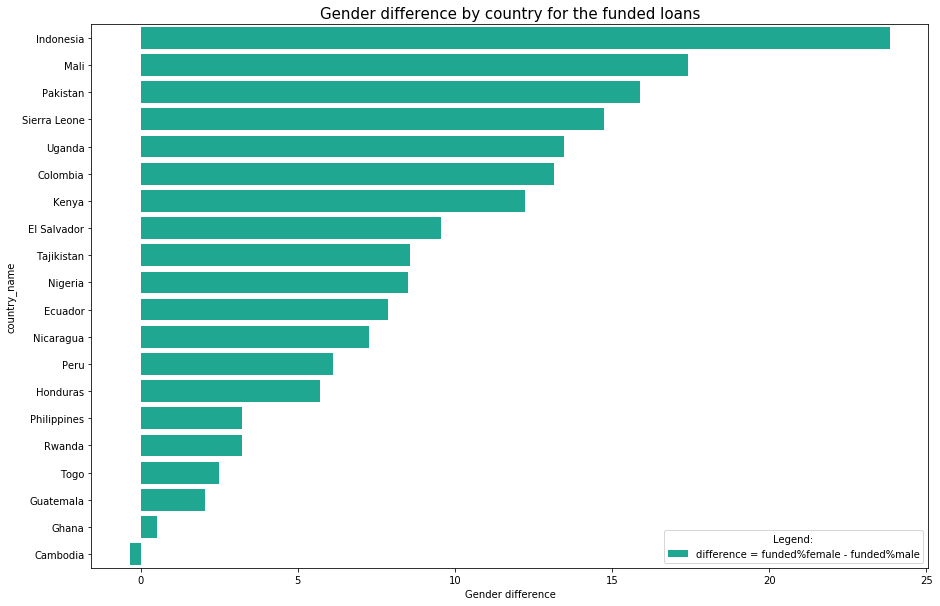

In [41]:
import itertools
s_force_order = df6.sort_values('difference', ascending=False)['country_name'].head(40)

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x='difference', y='country_name', data=df6,
            label='difference = funded%female - funded%male', color='#0abda0', order=s_force_order)

ax.legend(ncol=1, loc='lower right', frameon=True)
ax.set(ylabel='country_name',
       xlabel='Gender difference')

leg = ax.get_legend()
new_title = 'Legend:'
leg.set_title(new_title)
ax.set_title('Gender difference by country for the funded loans', fontsize=15)
plt.show()

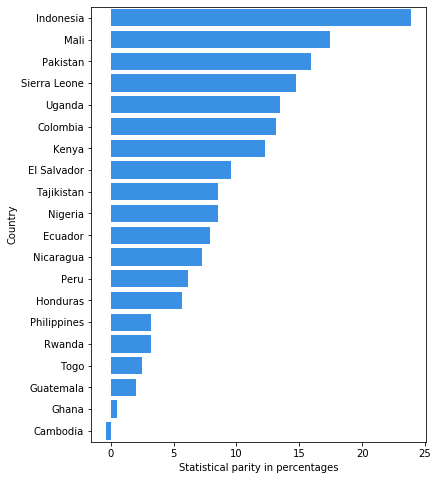

In [42]:
import itertools
s_force_order = df6.sort_values('difference', ascending=False)['country_name'].head(40)

fig, ax = plt.subplots(figsize=(6, 8))

sns.barplot(x='difference', y='country_name', data=df6,
            label='Statistical parity', color='dodgerblue', order=s_force_order)

#ax.legend(ncol=1, loc='lower right', frameon=True)
ax.set(ylabel='Country',
       xlabel='Statistical parity in percentages')

#leg = ax.get_legend()
#new_title = 'Legend:'
#leg.set_title(new_title)
#ax.set_title('Gender difference by country for the funded loans', fontsize=15)
plt.show()
fig.savefig('gender_bias_country.png', bbox_inches='tight')

# Top 40 field partners with more than 1000 loans (%)

##  Top 40 of field partners with more than 1 000 loans according to the % expired loans

In [44]:
len(kiva_loans[kiva_loans.country=='Philippines'])

160441

In [45]:
160441/671205

0.23903427417852965

In [46]:
len(merge1)

614010

In [47]:
len(merge1[merge1.country=='Philippines'])

185497

In [48]:
185497/614010

0.30210745753326496

In [51]:
df_theme= pd.read_csv("/Users/alexanderstevens/Desktop/loan_theme.csv",index_col=None).set_index("id")
df_locations= pd.read_csv("/Users/alexanderstevens/Desktop/loan_themeRegion.csv",index_col=None)
df_locations.rename(columns={"Partner ID":"partner_id"},inplace=True)

#Merge Kiva_loan with df_theme sheet with unique parner id
new_loan = pd.merge(kiva_loans,df_theme,how="inner",on="id")

#merge new loan sheet to loan_themesregion.csv
new_loan2 = pd.merge(new_loan,df_locations[df_locations.columns[~df_locations.columns.isin(['sector','Loan Theme Type'])]]
                     ,how='inner',on=["partner_id","Loan Theme ID","country","region"])

#Merge new_loan2, kiva_mpi_region_locations.csv 
#new_loan_mpi = pd.merge(new_loan2,mpi_reg,how="inner",on=["lat","lon","ISO","country","region","LocationName"])

In [52]:
len(kiva_loans)

671205

In [53]:
len(new_loan)

671199

In [54]:
len(new_loan2)

533462

In [55]:
new_loan2['Partner ID'].nunique()

284

In [56]:
new_loan2['Field Partner Name'].nunique()

284

In [57]:
new_loan2.isnull().sum()

funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                        5
country_code               8
country                    0
region                     0
currency                   0
partner_id                 0
posted_time                0
disbursed_time             0
funded_time            33912
term_in_months             0
lender_count               0
tags                  130019
borrower_genders           0
repayment_interval         0
date                       0
Loan Theme ID              0
Loan Theme Type            0
Partner ID                 0
Field Partner Name         0
forkiva                    0
geocode_old           424485
ISO                        1
number                     0
amount                     0
LocationName               0
geocode                14474
names                  14475
geo                        0
lat                    14474
lon                    14474
mpi_region    

In [58]:
new_loan2['Field Partner Name'].value_counts()

Negros Women for Tomorrow Foundation (NWTF)    104523
CrediCampo                                      15425
Juhudi Kilimo                                   15392
iDE Cambodia                                    14464
BRAC Pakistan                                   13564
                                                ...  
Impact Hub                                          1
N/A, direct to Nomanini                             1
N/A, direct to Thread International                 1
N/A, direct to Eco Fuels Kenya                      1
N/A, direct to EcoZoom                              1
Name: Field Partner Name, Length: 284, dtype: int64

In [59]:
new_loan2['Field Partner Name'].value_counts().loc[lambda x : x>999] 

Negros Women for Tomorrow Foundation (NWTF)                                        104523
CrediCampo                                                                          15425
Juhudi Kilimo                                                                       15392
iDE Cambodia                                                                        14464
BRAC Pakistan                                                                       13564
                                                                                    ...  
Pana Pana                                                                            1106
Thrive Microfinance                                                                  1101
Impact Carbon                                                                        1085
Alivio Capital                                                                       1005
Programme d'Appui aux Initiatives de DÍ©veloppement Economique au Kivu (PAIDEK)      1001
Name: Fiel

In [102]:
counts = new_loan2['Field Partner Name'].value_counts()
sub_df2 = new_loan2[~new_loan2['Field Partner Name'].isin(counts[counts < 1000].index)].copy()

In [61]:
len(sub_df2)

499055

In [62]:
sub_df2['status'] = np.where(sub_df2['funded_time'].isnull(), 'expired', 'funded')

In [63]:
sub_df2['status'].value_counts()

funded     467419
expired     31636
Name: status, dtype: int64

In [64]:
df10 = sub_df2.groupby(['Field Partner Name', 'status']).size()/sub_df2.groupby('Field Partner Name').size()

In [65]:
len(df10)

172

In [66]:
df10 = df10.to_frame()
df10 = df10.rename(columns={0: 'percentage'})
df10.reset_index(level=1, inplace=True)
df10.reset_index(level=0, inplace=True)

In [67]:
df10.columns.values

array(['Field Partner Name', 'status', 'percentage'], dtype=object)

In [68]:
# om plot wat beter leesbaar te maken
df10['Field Partner Name']=df10['Field Partner Name'].replace({"RÃ\x8dÂ©seau de Micro-institutions de Croissance de Revenus (RMCR)": "RMCR"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"Programme d'Appui aux Initiatives de DÃ\x8dÂ©veloppement Economique au Kivu (PAIDEK)": "PAIDEK"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"Micro Credit for Development and Transformation SACCO (MCDT SACCO)": "MCDT SACCO"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"Together Association for Development and Environment (TADE)": "TADE"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"FundaciÃ\x8d_n Mario Santo Domingo (FMSD)": "Fundacion Mario Santo Domingo (FMSD)"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"AsociaciÃ\x8d_n Arariwa": "Asociacion Arariwa"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"FundaciÃ\x8d_n ESPOIR": "Fundacion ESPOIR"})
df10['Field Partner Name']=df10['Field Partner Name'].replace({"CrÃ\x8dÂ©dit Epargne Formation (CEFOR)": "Crédit Epargne Formation (CEFOR)"})

In [69]:
len(df10)

172

In [70]:
df10.head(10)

,Field Partner Name,status,percentage
0,ADICLA,expired,0.053922
1,ADICLA,funded,0.946078
2,Agro & Social Fund,expired,0.126472
3,Agro & Social Fund,funded,0.873528
4,Al Majmoua,expired,0.075274
5,Al Majmoua,funded,0.924726
6,Alalay sa Kaunlaran (ASKI),expired,0.014516
7,Alalay sa Kaunlaran (ASKI),funded,0.985484
8,Alivio Capital,expired,0.144279
9,Alivio Capital,funded,0.855721


In [71]:
df10 = df10.pivot(index='Field Partner Name', columns='status', values='percentage')
df10

status,expired,funded
Field Partner Name,,
ADICLA,0.053922,0.946078
Agro & Social Fund,0.126472,0.873528
Al Majmoua,0.075274,0.924726
Alalay sa Kaunlaran (ASKI),0.014516,0.985484
Alivio Capital,0.144279,0.855721
...,...,...
VisionFund Cambodia,0.080659,0.919341
VisionFund Ecuador,0.042011,0.957989
VisionFund Kenya,0.063341,0.936659


In [72]:
df10['expired'] = df10['expired'].fillna(0)
df10['funded'] = df10['funded'].fillna(0)

df10['total'] = df10['expired'].fillna(0) + df10['funded'].fillna(0)
df10 = df10.sort_values(by='funded', ascending=False)
df10.reset_index(level=0, inplace=True)

In [73]:
df10.iloc[:,1:] = df10.iloc[:,1:].mul(100)

In [74]:
df10

status,Field Partner Name,expired,funded,total
0,Camfed Zimbabwe,0.000000,100.000000,100.0
1,Belghoria Janakalyan Samity,0.000000,100.000000,100.0
2,MCDT SACCO,0.065445,99.934555,100.0
3,AsociaciÍ_n Arariwa,0.125366,99.874634,100.0
4,EDAPROSPO,0.213980,99.786020,100.0
...,...,...,...,...
82,Interactuar,20.634921,79.365079,100.0
83,SEF International,21.852046,78.147954,100.0
84,Nor Horizon,22.204641,77.795359,100.0
85,CIDRE,23.056300,76.943700,100.0


Worst field partners

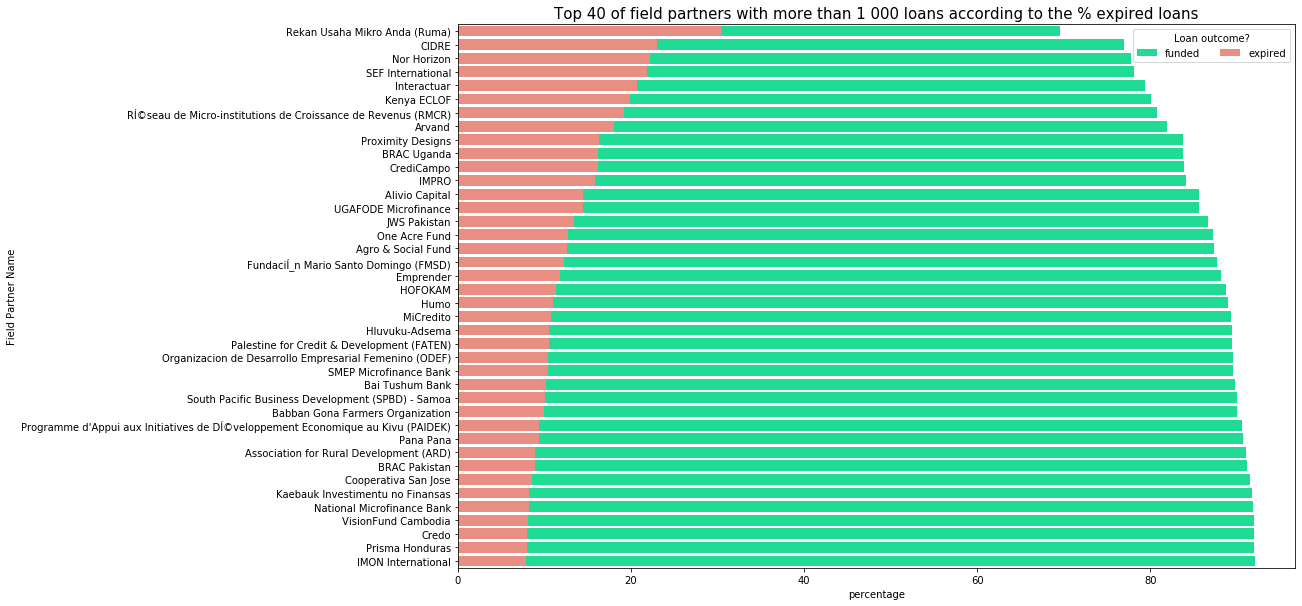

In [75]:
s_force_order = df10.sort_values('expired', ascending=False)['Field Partner Name'].head(40)

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x='funded', y='Field Partner Name', data=df10,
            label='funded', color='mediumspringgreen', order=s_force_order)

sns.barplot(x='expired', y='Field Partner Name', data=df10,
            label='expired', color='salmon', order=s_force_order)

ax.legend(ncol=2, loc='best', frameon=True)
ax.set(ylabel='Field Partner Name',
       xlabel='percentage')

leg = ax.get_legend()
new_title = 'Loan outcome?'
leg.set_title(new_title)
ax.set_title('Top 40 of field partners with more than 1 000 loans according to the % expired loans', fontsize=15)
plt.show()

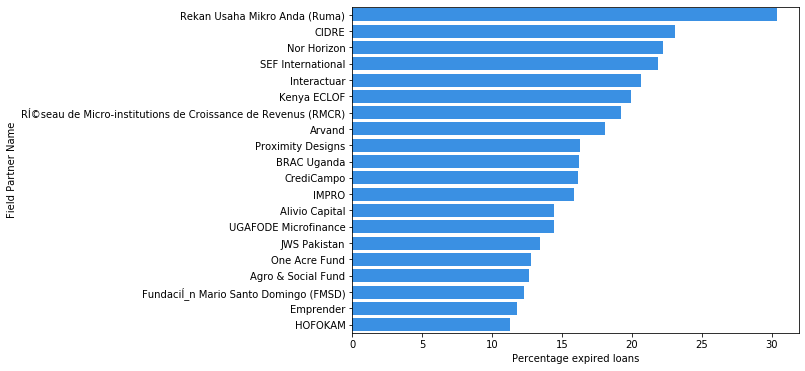

In [76]:
s_force_order = df10.sort_values('expired', ascending=False)['Field Partner Name'].head(20)

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='expired', y='Field Partner Name', data=df10,
            label='expired', color='dodgerblue', order=s_force_order)

#ax.legend(ncol=2, loc='best', frameon=True)
ax.set(ylabel='Field Partner Name',
       xlabel='Percentage expired loans')

#leg = ax.get_legend()
#new_title = 'Loan outcome?'
#leg.set_title(new_title)
#ax.set_title('Top 40 of field partners with more than 1 000 loans according to the % expired loans', fontsize=15)
plt.show()
fig.savefig('field_%expired_worst.png', bbox_inches='tight')

## Top 40 of field partners with more than 1 000 loans according to the % funded loans``

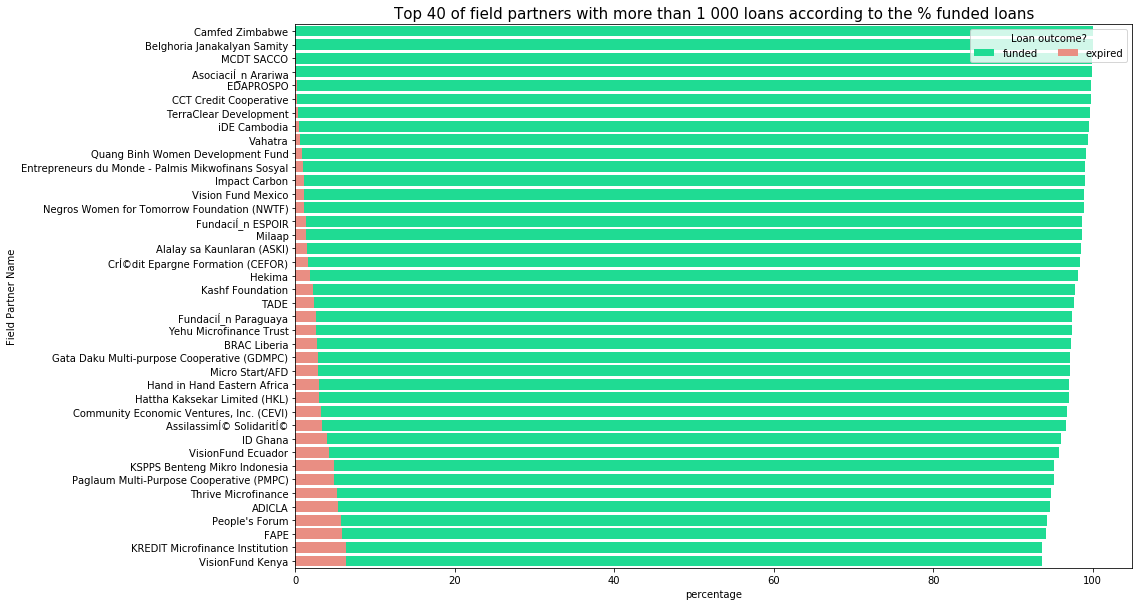

In [77]:
s_force_order = df10.sort_values('funded', ascending=False)['Field Partner Name'].head(40)

fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(x='funded', y='Field Partner Name', data=df10,
            label='funded', color='mediumspringgreen', order=s_force_order)

sns.barplot(x='expired', y='Field Partner Name', data=df10,
            label='expired', color='salmon', order=s_force_order)

ax.legend(ncol=2, loc='best', frameon=True)
ax.set(ylabel='Field Partner Name',
       xlabel='percentage')

leg = ax.get_legend()
new_title = 'Loan outcome?'
leg.set_title(new_title)
ax.set_title('Top 40 of field partners with more than 1 000 loans according to the % funded loans', fontsize=15)
plt.show()

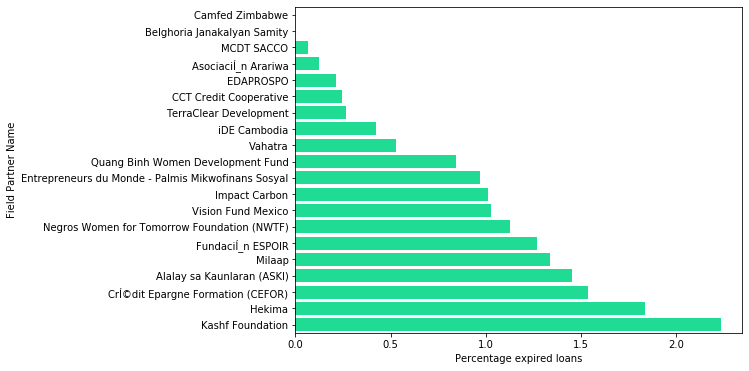

In [78]:
s_force_order = df10.sort_values('funded', ascending=False)['Field Partner Name'].head(20)

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='expired', y='Field Partner Name', data=df10,
            label='expired', color='mediumspringgreen', order=s_force_order)

#ax.legend(ncol=2, loc='best', frameon=True)
ax.set(ylabel='Field Partner Name',
       xlabel='Percentage expired loans')

#leg = ax.get_legend()
#new_title = 'Loan outcome?'
#leg.set_title(new_title)
#ax.set_title('Top 40 of field partners with more than 1 000 loans according to the % funded loans', fontsize=15)
plt.show()
fig.savefig('field_%expired_best.png', bbox_inches='tight')

# Expired loans per sector

## Percentages

In [79]:
new_loan2['Field Partner Name'][new_loan2["country"] == 'Pakistan'].unique()

array(['BRAC Pakistan', 'Kashf Foundation', 'JWS Pakistan',
       'N/A, direct to EcoEnergy'], dtype=object)

In [80]:
new_loan2['Field Partner Name'][new_loan2["country"] == 'Philippines'].unique()

array(['Negros Women for Tomorrow Foundation (NWTF)',
       'Alalay sa Kaunlaran (ASKI)',
       'Paglaum Multi-Purpose Cooperative (PMPC)',
       'Community Economic Ventures, Inc. (CEVI)',
       'Gata Daku Multi-purpose Cooperative (GDMPC)',
       'CCT Credit Cooperative', 'BagoSphere', 'SEED Center Philippines',
       'N/A, direct to Kalsada'], dtype=object)

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [86]:
# Sample of loans from 2012-2017 and only field_partner loans
merge1=merge1[(merge1['year']>=2012) & (merge1['year']<=2017) & (merge1['distribution_model']=='field_partner')]

In [87]:
merge_expired = merge1[merge1['status'] == 'expired'].copy()

In [88]:
expired_sector = merge_expired['sector_name'].value_counts()
expired_sector

Agriculture       9891
Retail            8734
Food              5923
Housing           2986
Clothing          2282
Services          2210
Transportation    1324
Personal Use       961
Education          425
Construction       122
Health              71
Arts                28
Wholesale           11
Entertainment        1
Name: sector_name, dtype: int64

In [89]:
total_sector = merge1['sector_name'].value_counts()
total_sector

Agriculture       166371
Food              129878
Retail            123939
Personal Use       38635
Services           36813
Housing            28260
Clothing           27893
Education          20352
Transportation     14643
Arts               10012
Health              5847
Manufacturing       5497
Construction        4840
Wholesale            544
Entertainment        486
Name: sector_name, dtype: int64

In [90]:
verhouding = (expired_sector/total_sector)*100
verhouding

Agriculture        5.945147
Arts               0.279664
Clothing           8.181264
Construction       2.520661
Education          2.088247
Entertainment      0.205761
Food               4.560434
Health             1.214298
Housing           10.566171
Manufacturing           NaN
Personal Use       2.487382
Retail             7.047015
Services           6.003314
Transportation     9.041863
Wholesale          2.022059
Name: sector_name, dtype: float64

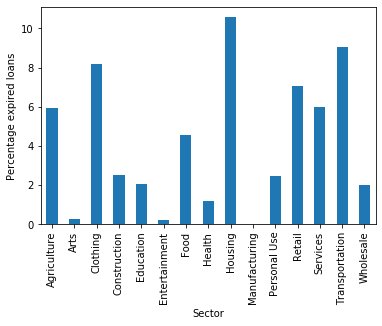

In [91]:
fig = plt.figure()
verhouding.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Percentage expired loans')
fig.savefig('sector_%expired.png', bbox_inches='tight')

## Absolute values

<Figure size 432x288 with 0 Axes>

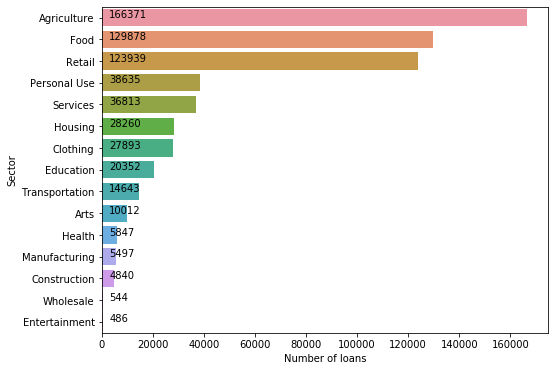

In [92]:
fig = plt.figure()
plt.figure(figsize=(8,6))
sector_name = merge1['sector_name'].value_counts()
bar = sns.barplot(sector_name.values, sector_name.index)
for i, v in enumerate(sector_name.values):
    plt.text(3000,i,v,color='k',fontsize=10)
bar.set(xlabel='Number of loans', ylabel='Sector')
bar.figure.savefig("sector_absolute.png", bbox_inches='tight')

# Number of loans per country

<Figure size 432x288 with 0 Axes>

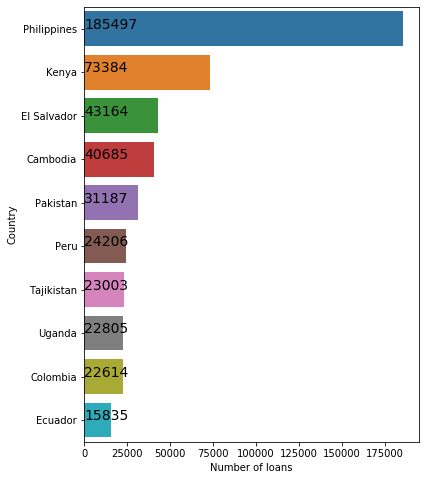

In [93]:
fig = plt.figure()
plt.figure(figsize=(6,8))
country = merge1['country_name'].value_counts().head(10)
bar2 = sns.barplot(country.values, country.index, )
for i, v in enumerate(country.values):
    plt.text(0.8,i,v,color='k',fontsize=14)
bar2.set(xlabel='Number of loans', ylabel='Country')
bar2.figure.savefig("country_absolute.png", bbox_inches='tight')

# Percentage expired loans per gender

In [101]:
len(merge1)

614010

In [96]:
merge1['gender_reclassified'].value_counts()

female    481558
male      132452
Name: gender_reclassified, dtype: int64

In [97]:
# Table of status vs gender reclassified
target_gender = pd.crosstab(index=merge1["gender_reclassified"], 
                            columns=merge1["status"],
                             margins=True)   # Include row and column totals
target_gender.columns = ["expired","funded","rowtotal"]
target_gender.index= ["female","male","coltotal"]
target_gender

,expired,funded,rowtotal
female,16947,464611,481558
male,18022,114430,132452
coltotal,34969,579041,614010


In [98]:
# Proportions
target_gender_proportions=target_gender.div(target_gender["rowtotal"],
                   axis=0)
target_gender_proportions = target_gender_proportions*100
target_gender_proportions

,expired,funded,rowtotal
female,3.519202,96.480798,100.0
male,13.606439,86.393561,100.0
coltotal,5.695184,94.304816,100.0


In [99]:
target_gender_proportions=target_gender_proportions.loc[['female', 'male'], :'expired']

<Figure size 432x288 with 0 Axes>

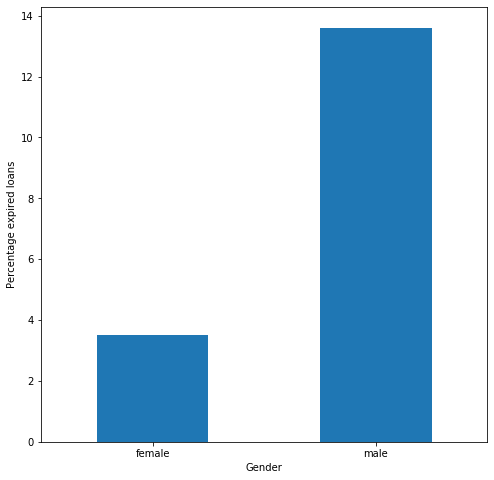

In [100]:
fig = plt.figure()
target_gender_proportions.plot(kind="bar", 
                 figsize=(8,8),legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel('Gender')
plt.ylabel('Percentage expired loans')
fig.savefig('Gender_%expired.png', bbox_inches='tight')